In [1]:
import galah
from matplotlib import pyplot as plt
import geopandas as gpd
import pandas as pd
import shapely
from shapely.ops import unary_union, linemerge, split
from shapely.geometry import Point

In [2]:
galah.galah_config(atlas="Australia", email="callumwaite2000@gmail.com", data_profile="ALA") 

In [3]:
galah.search_taxa(taxa="Varanus giganteus")

,scientificName,scientificNameAuthorship,taxonConceptID,rank,kingdom,phylum,order,family,genus,species,vernacularName,issues
0,Varanus giganteus,"(Gray, 1845)",https://biodiversity.org.au/afd/taxa/a9e30c28-...,species,Animalia,Chordata,Squamata,Varanidae,Varanus,Varanus giganteus,Perentie,noIssue


In [4]:
galah.atlas_counts(taxa="Varanus giganteus",use_data_profile=True)

,totalRecords
0,786


In [5]:
galah.atlas_counts(taxa="Varanus giganteus",use_data_profile=True,group_by="basisOfRecord",expand=False)

,basisOfRecord,count
0,HUMAN_OBSERVATION,613
1,MATERIAL_SAMPLE,12
2,OBSERVATION,1
3,OCCURRENCE,54
4,PRESERVED_SPECIMEN,106


In [6]:
galah.atlas_counts(taxa="Varanus giganteus",use_data_profile=True,filters="basisOfRecord=HUMAN_OBSERVATION",group_by="dataResourceName",expand=False)

,dataResourceName,count
0,Fauna Atlas N.T.,357
1,iNaturalist Australia,142
2,SA Fauna,60
3,Earth Guardians Weekly Feed,22
4,ALA species sightings and OzAtlas,20
5,Northern Territory WildWatch,5
6,WildNet - Queensland Wildlife Data,5
7,NSW BioNet Atlas,1
8,NatureMapr,1


In [7]:
galah.atlas_counts(taxa="Varanus giganteus",use_data_profile=True,filters=["basisOfRecord=HUMAN_OBSERVATION","year>=1970"],group_by="dataResourceName",expand=False)

,dataResourceName,count
0,Fauna Atlas N.T.,356
1,iNaturalist Australia,142
2,SA Fauna,60
3,Earth Guardians Weekly Feed,22
4,ALA species sightings and OzAtlas,20
5,Northern Territory WildWatch,5
6,WildNet - Queensland Wildlife Data,5
7,NSW BioNet Atlas,1
8,NatureMapr,1


In [8]:
galah.atlas_counts(taxa="Varanus giganteus",use_data_profile=True,filters=["basisOfRecord=HUMAN_OBSERVATION","year>=1970"],group_by="year",expand=False)

,year,count
0,1975,5
1,1976,4
2,1977,2
3,1979,2
4,1981,1
5,1982,1
6,1983,2
7,1984,15
8,1985,25
9,1986,27


In [10]:
perentie_occ = galah.atlas_occurrences(
    taxa="Varanus giganteus",
    use_data_profile=True,
    filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"]
)

In [11]:
states_territories = gpd.read_file("Shapefiles/STE_2021_AUST_GDA2020/STE_2021_AUST_GDA2020.shp")
states_territories_main = states_territories[states_territories["STE_NAME21"] != "Other Territories"]
states_territories_main = states_territories_main.to_crs(4326)

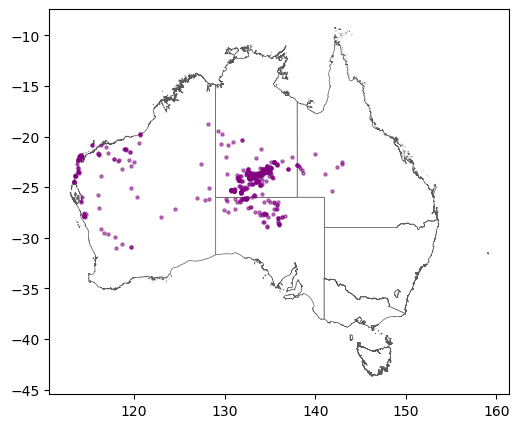

In [12]:
states_territories_main.plot(edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
plt.scatter(
    perentie_occ["decimalLongitude"],
    perentie_occ["decimalLatitude"],
    c = "purple", 
    s = 5,
    alpha = 0.5
)   

In [15]:
data_provider_counts = galah.atlas_counts(
    taxa="Varanus giganteus",
    use_data_profile=True,
    filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "decimalLatitude<0"],
    group_by="dataResourceName",
    expand=False)
data_provider_counts

,dataResourceName,count
0,Fauna Atlas N.T.,356
1,iNaturalist Australia,142
2,SA Fauna,60
3,Earth Guardians Weekly Feed,22
4,ALA species sightings and OzAtlas,20
5,Northern Territory WildWatch,5
6,WildNet - Queensland Wildlife Data,5
7,NSW BioNet Atlas,1
8,NatureMapr,1


In [16]:
occurrences = {data_provider_counts["dataResourceName"][i]: None for i in range(8)}
for i in range(8):
    occurrences[data_provider_counts["dataResourceName"][i]] = galah.atlas_occurrences(
            taxa="Varanus giganteus",
            use_data_profile=True,
            filters=["basisOfRecord=HUMAN_OBSERVATION", 
                     "year>=1970",
                     "decimalLatitude<0",
                     "dataResourceName={}".format(data_provider_counts["dataResourceName"][i])]
        )

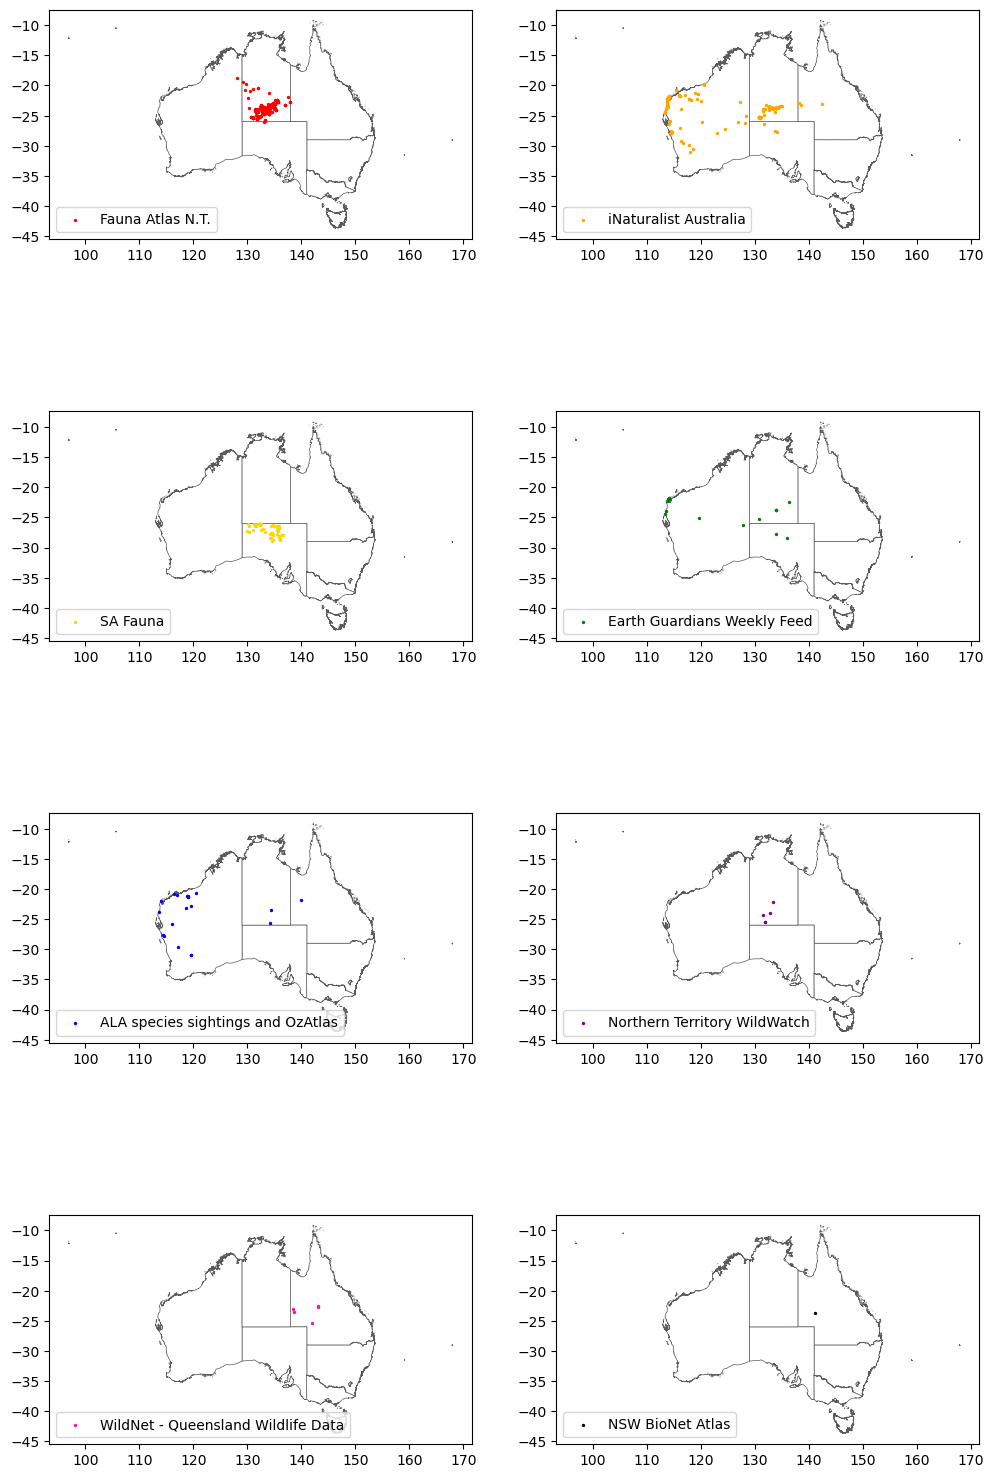

In [17]:
fig, axs = plt.subplots(4,2,figsize=(12,20))
index_for_occurrences = 0
colors = ["red","orange","gold","green","blue","purple","deeppink","black","seagreen","sienna"]
for i in range(4):
    for j in range(2):
        index_for_occurrences+=j
        states_territories.plot(ax = axs[i][j], edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
        axs[i][j].scatter(
            occurrences[data_provider_counts["dataResourceName"][index_for_occurrences]]["decimalLongitude"],
            occurrences[data_provider_counts["dataResourceName"][index_for_occurrences]]["decimalLatitude"],
            c = colors[index_for_occurrences], 
            s=2,
            label=data_provider_counts["dataResourceName"][index_for_occurrences]
        )
        axs[i][j].legend(loc="lower left")
    index_for_occurrences+=1

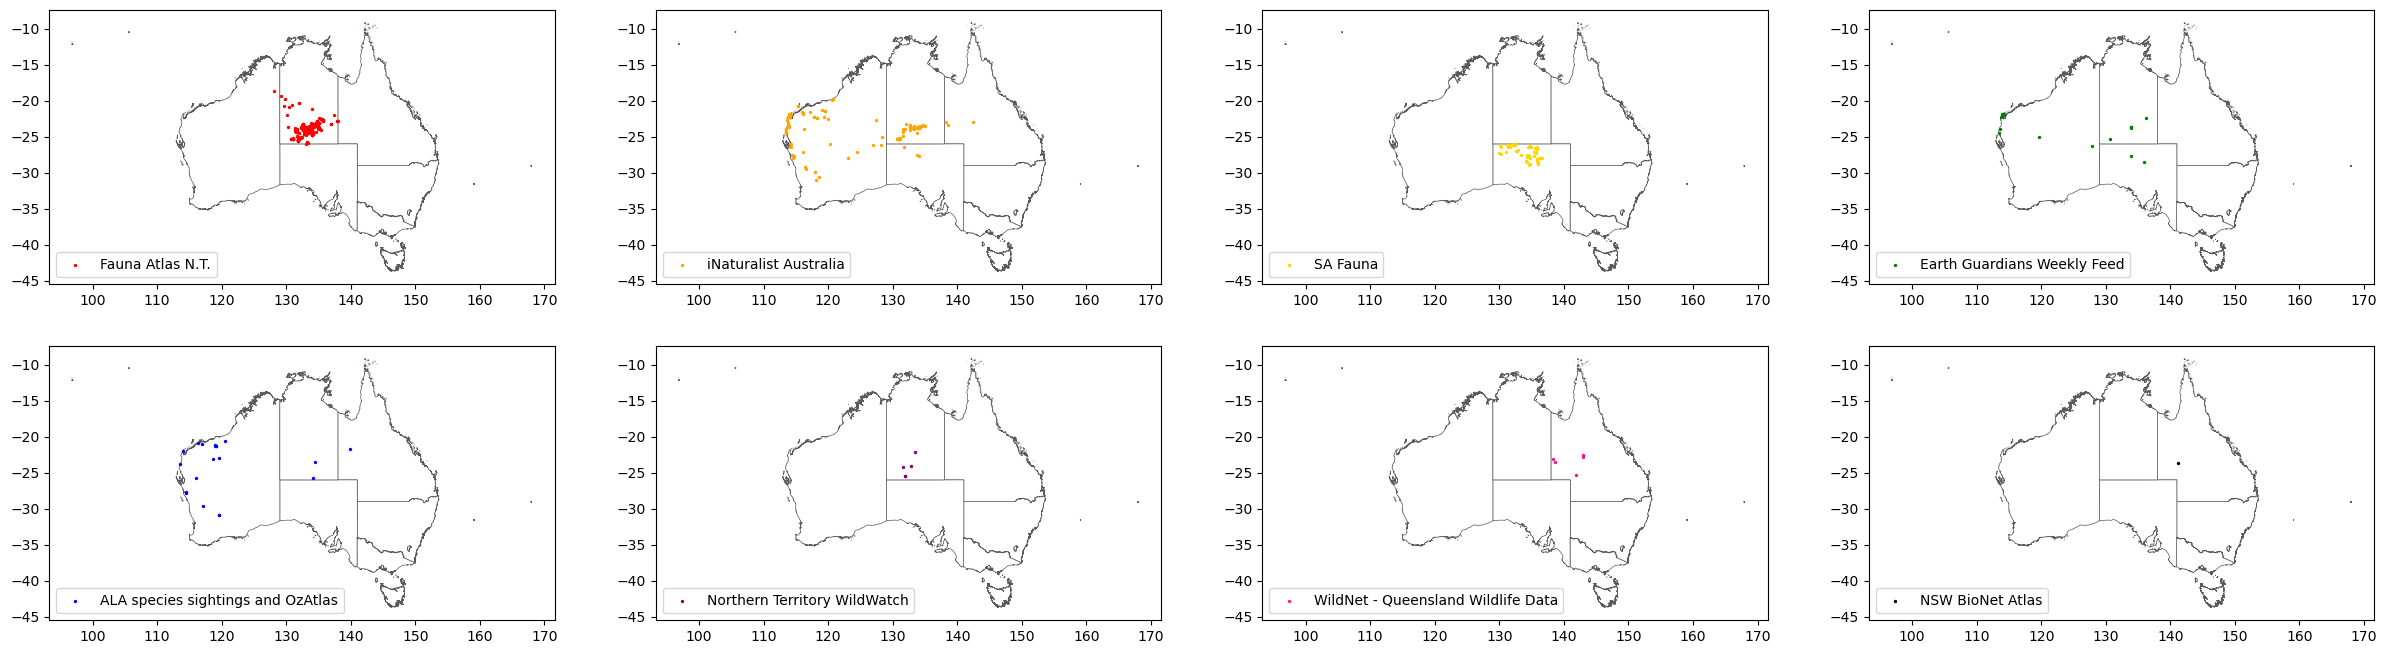

In [18]:
fig, axs = plt.subplots(2,4,figsize=(30,8))
index_for_occurrences = 0
colors = ["red","orange","gold","green","blue","purple","deeppink","black","seagreen","sienna"]
for i in range(2):
    for j in range(4):
        states_territories.plot(ax = axs[i][j], edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
        axs[i][j].scatter(
            occurrences[data_provider_counts["dataResourceName"][index_for_occurrences]]["decimalLongitude"],
            occurrences[data_provider_counts["dataResourceName"][index_for_occurrences]]["decimalLatitude"],
            c = colors[index_for_occurrences], 
            s=2,
            label=data_provider_counts["dataResourceName"][index_for_occurrences]
        )
        axs[i][j].legend(loc="lower left")
        index_for_occurrences+=1
plt.savefig("Perentie_dataresourcename_map.png",dpi=600)

In [ ]:
## Occurrences Australia wide vs all species vs reptiles

In [19]:
Perentie_AUS = galah.atlas_counts(
    taxa="Varanus giganteus",
    use_data_profile=True,
    filters=[
        "basisOfRecord=HUMAN_OBSERVATION",
        "year>=1970",
        "decimalLatitude<0"
    ],
    group_by=["year"],
    expand=False).rename(columns={"count": "Perentie"})

In [20]:
all_species_AUS = galah.atlas_counts(
    use_data_profile=True,
    filters=[
        "basisOfRecord=HUMAN_OBSERVATION",
        "year>=1970"
    ],
    group_by=["year"],
    expand=False).rename(columns={"count": "All Species"})

In [21]:
reptiles_AUS = galah.atlas_counts(
    taxa = "Reptilia",
    use_data_profile=True,
    filters=[
        "basisOfRecord=HUMAN_OBSERVATION",
        "year>=1970"
    ],
    group_by=["year"],
    expand=False).rename(columns={"count": "Reptiles"})

In [22]:
counts_year = all_species_AUS.merge(reptiles_AUS, on="year", how="left").merge(Perentie_AUS, on="year", how="left").fillna(0)
counts_year.head()

,year,All Species,Reptiles,Perentie
0,1970,172817,285,0.0
1,1971,77237,236,0.0
2,1972,67950,448,0.0
3,1973,74741,357,0.0
4,1974,69963,415,0.0


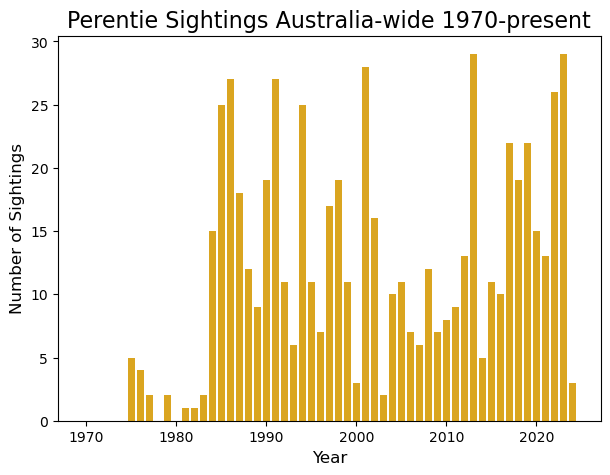

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.bar(counts_year["year"], counts_year["Perentie"],color = "goldenrod") # alpha = 0.5
plt.title("Perentie Sightings Australia-wide 1970-present",fontsize=16)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Number of Sightings",fontsize=12)
plt.savefig("Perentie_by_year_Aus.png",dpi=600)

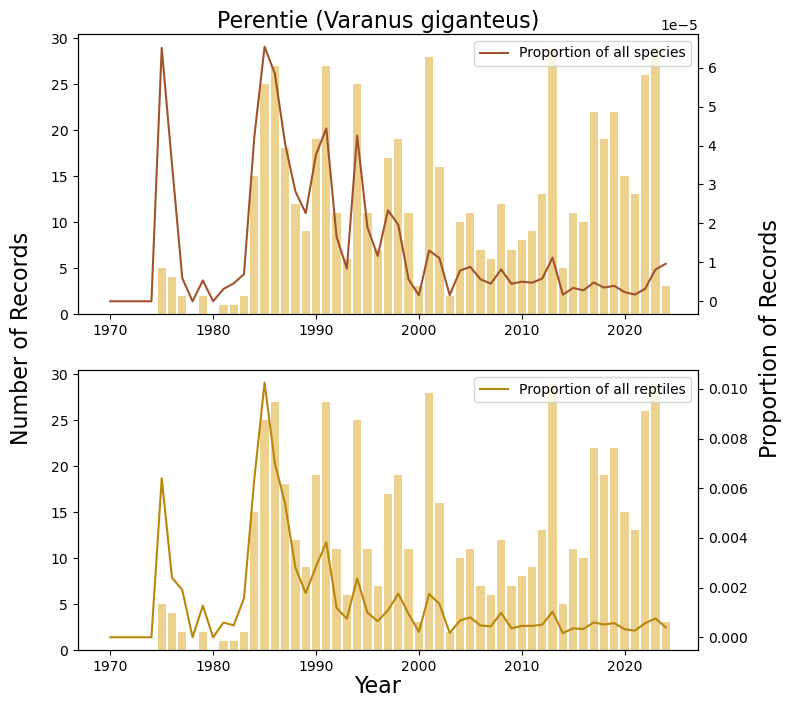

In [24]:
counts_year["Proportion of total counts all"] = counts_year["Perentie"] / counts_year["All Species"]
counts_year["Proportion of total counts reptiles"] = counts_year["Perentie"] / counts_year["Reptiles"]
counts_year.head()

fig, ax = plt.subplots(2, 1, figsize=(8,8))
ax2 = ax[0].twinx()
ax[0].bar(counts_year["year"], counts_year["Perentie"], color = "goldenrod", alpha=0.5)
ax2.plot(counts_year["year"], counts_year["Proportion of total counts all"], color="sienna", label="Proportion of all species")
ax2.legend()

# second graph
ax3 = ax[1].twinx()
ax[1].bar(counts_year["year"], counts_year["Perentie"], color = "goldenrod", alpha=0.5)
ax3.plot(counts_year["year"], counts_year["Proportion of total counts reptiles"], color="darkgoldenrod", label="Proportion of all reptiles")
ax3.legend()

# add title
fig.suptitle("Perentie (Varanus giganteus)",size=16,y=0.91)
fig.supxlabel("Year",size=16,y=0.05)
fig.supylabel("Number of Records",size=16,x=0.04)
fig.text(x=0.99, y=0.5, s="Proportion of Records", size=16, rotation=90, ha='center', va='center')
plt.savefig("Perentie_Proportions_AUS_vertical.png",dpi=300)

In [ ]:
# Cats and Foxes

In [ ]:
##### Dingo Fence ?

In [34]:
SA = states_territories[states_territories["STE_NAME21"] == "South Australia"]
dog_fence = gpd.read_file("Shapefiles/SA Dingo Fence/Dog_Fence.shp").to_crs(4326)

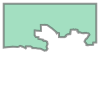

In [35]:
SA_shapely = shapely.ops.unary_union(SA.geometry)
dog_fence_shapely = shapely.ops.unary_union(dog_fence.geometry)
SA_split_shapely = split(SA_shapely, dog_fence_shapely)
# Note that [90] is the part of SA north of the dog fence
SA_split_shapely.geoms[90]

In [36]:
Perentie_SA_N = galah.atlas_counts(taxa="Varanus giganteus", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], polygon = SA_split_shapely.geoms[90], expand=False).rename(columns={"count": "Perentie N"})
Perentie_SA_all = galah.atlas_counts(taxa="Varanus giganteus", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], expand=False).rename(columns={"count": "Perentie"})
all_species_SA_N = galah.atlas_counts(use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], polygon = SA_split_shapely.geoms[90], expand=False).rename(columns={"count": "All Species N"})
all_species_SA_all = galah.atlas_counts(use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], expand=False).rename(columns={"count": "All Species"})
reptiles_SA_N = galah.atlas_counts(taxa="Reptilia", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], polygon = SA_split_shapely.geoms[90], expand=False).rename(columns={"count": "Reptiles N"})
reptiles_SA_all = galah.atlas_counts(taxa="Reptilia", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], expand=False).rename(columns={"count": "Reptiles"}) 

In [37]:
counts_SA_year_all = all_species_SA_all.merge(reptiles_SA_all, on="year", how="left").merge(Perentie_SA_all, on="year", how="left").fillna(0)
counts_SA_year_N = all_species_SA_N.merge(reptiles_SA_N, on="year", how="left").merge(Perentie_SA_N, on="year", how="left").fillna(0)
counts_SA_year_NS = counts_SA_year_all.merge(counts_SA_year_N, on="year", how="left").fillna(0)
counts_SA_year_NS["All Species S"] = counts_SA_year_NS["All Species"] - counts_SA_year_NS["All Species N"]
counts_SA_year_NS["Reptiles S"] = counts_SA_year_NS["Reptiles"] - counts_SA_year_NS["Reptiles N"]
counts_SA_year_NS["Perentie S"] = counts_SA_year_NS["Perentie"] - counts_SA_year_NS["Perentie N"]

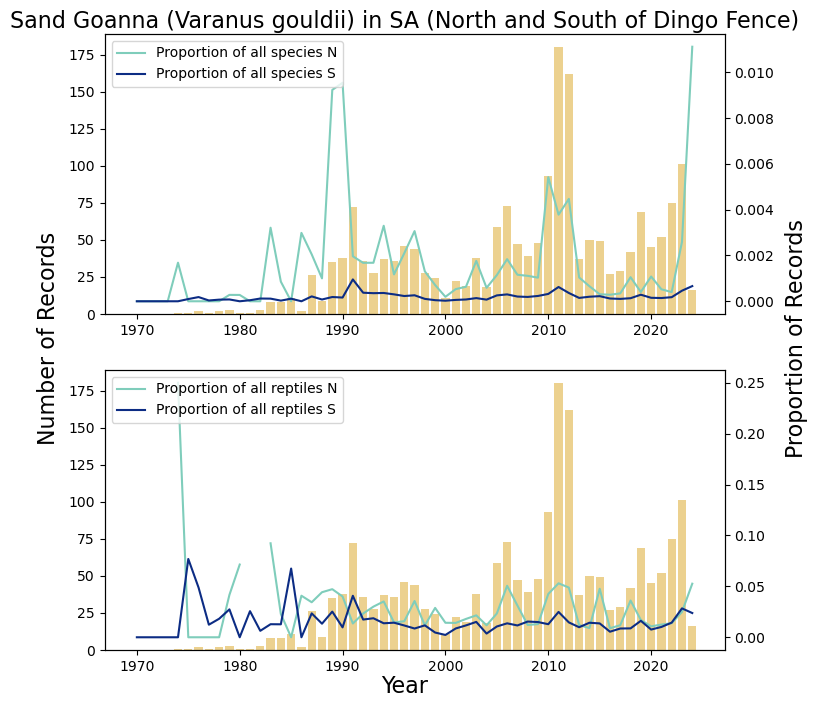

In [42]:
counts_SA_year_NS["SA proportion of total counts all N"] = counts_SA_year_NS["Perentie N"] / counts_SA_year_NS["All Species N"]
counts_SA_year_NS["SA proportion of total counts all S"] = counts_SA_year_NS["Perentie S"] / counts_SA_year_NS["All Species S"]
counts_SA_year_NS["SA proportion of total counts reptiles N"] = counts_SA_year_NS["Perentie N"] / counts_SA_year_NS["Reptiles N"]
counts_SA_year_NS["SA proportion of total counts reptiles S"] = counts_SA_year_NS["Perentie S"] / counts_SA_year_NS["Reptiles S"]

fig, ax = plt.subplots(2, 1, figsize=(8,8))
ax2 = ax[0].twinx()
ax[0].bar(counts_SA_year_NS["year"], counts_SA_year_NS["Perentie"], color = "goldenrod", alpha=0.5)
ax2.plot(counts_SA_year_NS["year"], counts_SA_year_NS["SA proportion of total counts all N"], color="#7fcdbb", label="Proportion of all species N")
ax2.plot(counts_SA_year_NS["year"], counts_SA_year_NS["SA proportion of total counts all S"], color="#0c2c84", label="Proportion of all species S")
ax2.legend(loc = "upper left")

# second graph
ax3 = ax[1].twinx()
ax[1].bar(counts_SA_year_NS["year"], counts_SA_year_NS["Perentie"], color = "goldenrod", alpha=0.5)
ax3.plot(counts_SA_year_NS["year"], counts_SA_year_NS["SA proportion of total counts reptiles N"], color="#7fcdbb", label="Proportion of all reptiles N")
ax3.plot(counts_SA_year_NS["year"], counts_SA_year_NS["SA proportion of total counts reptiles S"], color="#0c2c84", label="Proportion of all reptiles S")
ax3.legend(loc = "upper left")

# add title
fig.suptitle("Perentie (Varanus giganteus) in SA (North and South of Dingo Fence)",size=16,y=0.91)
fig.supxlabel("Year",size=16,y=0.05)
fig.supylabel("Number of Records",size=16,x=0.04)
fig.text(x=0.99, y=0.5, s="Proportion of Records", size=16, rotation=90, ha='center', va='center')
plt.savefig("Perentie_dingo_fence_proportions_SA_vertical.png",dpi=300)

In [43]:
Perentie_SA_occs = galah.atlas_occurrences(taxa="Varanus giganteus", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"])

In [44]:
geometry = [Point(xy) for xy in zip(Perentie_SA_occs.decimalLongitude, Perentie_SA_occs.decimalLatitude)]

In [45]:
Perentie_SA_occs = gpd.GeoDataFrame(Perentie_SA_occs, crs="EPSG:4326", geometry=geometry)
dingo_fence_N_gdf = gpd.GeoDataFrame(index=[0], crs='EPSG:4326', geometry=[SA_split_shapely.geoms[90]])

In [46]:
Perentie_SA_occs_NS = gpd.sjoin(dingo_fence_N_gdf, Perentie_SA_occs, how = "right")
Perentie_SA_occs_NS["Side of Dingo Fence"] = ['S' if pd.isnull(a) else 'N' for a in Perentie_SA_occs_NS['index_left']]
Perentie_SA_occs_NS["color"] = ['#0c2c84' if pd.isnull(a) else '#7fcdbb' for a in Perentie_SA_occs_NS['index_left']]

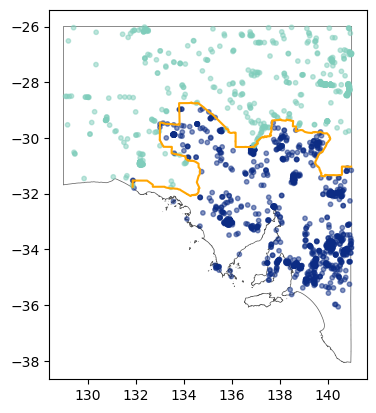

In [47]:
fig , ax = plt.subplots(1,1)
SA.plot(ax = ax, edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
plt.scatter(Perentie_SA_occs_NS["decimalLongitude"], Perentie_SA_occs_NS["decimalLatitude"], color = Perentie_SA_occs_NS["color"], alpha = 0.5, s=10)
dog_fence.plot(ax = ax, edgecolor = "orange")
plt.savefig("Perentie_Dingo_Fence_SA_map.png",dpi=300)